# Optimising Gradient Descent for Linear Regression

Automating the process of optimizing $w$ and $b$ using gradient descent.

$$ \min_{w, b} J(w, b) $$

| Symbol | |
| --- | --- |
| w | The weight (or slope) of the linear regression model. |
| b | The y intercept (or bias) of the linear regression model. |
| J(w, b) | The cost function, typically the Mean Squared Error (MSE) |

In [42]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')
from utils_grad_dec import plt_contour_mgrad, plt_divergence, plt_gradients, compute_model_output

In [43]:
# Load a simple data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

#### Implement Gradient Descent

In [44]:
def compute_cost(x, y, w, b): 
    # number of training examples
    n = x.shape[0] 
    cost_sum = 0 
    for i in range(n): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * n)) * cost_sum  
    return total_cost

In [45]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost m.r.t. the parameters w
      dj_db (scalar): The gradient of the cost m.r.t. the parameter b     
     """
    # Number of training examples
    n = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(n):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / n 
    dj_db = dj_db / n 
        
    return dj_dw, dj_db

In [46]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    # An array to store cost J and m's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    data = pd.DataFrame(
      {
        "Iteration": ["Initial"],
        "Cost": [f"{cost_function(x, y, w , b):.6f}"],
        "w part deriv": [""],
        "b part deriv": [""],
        "w": [w_in],
        "b": [b_in],
      },
      )
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:       
            new_row = pd.DataFrame(
            {
              "Iteration": [i],
              "Cost": [f"{J_history[-1]:.6f}"],
              "w part deriv": [f"{dj_dw:.6f}"],
              "b part deriv": [f"{dj_db:.6f}"],
              "w": [w],
              "b": [b],
            },
            )
            data = pd.concat([data, new_row])
    new_row = pd.DataFrame(
      {
        "Iteration": ["Final"],
        "Cost": [f"{J_history[-1]:.6f}"],
        "w part deriv": [f"{dj_dw:.6f}"],
        "b part deriv": [f"{dj_db:.6f}"],
        "w": [w],
        "b": [b],
      },
      )
    data = pd.concat([data, new_row])
    return w, b, J_history, p_history, data #return wb and J,w history for graphing

#### Visualise Gradient Decent

Gradient descent optimisation reduces computational demand and increases intuition. Optimisation aims to achieve convergence more efficiently.

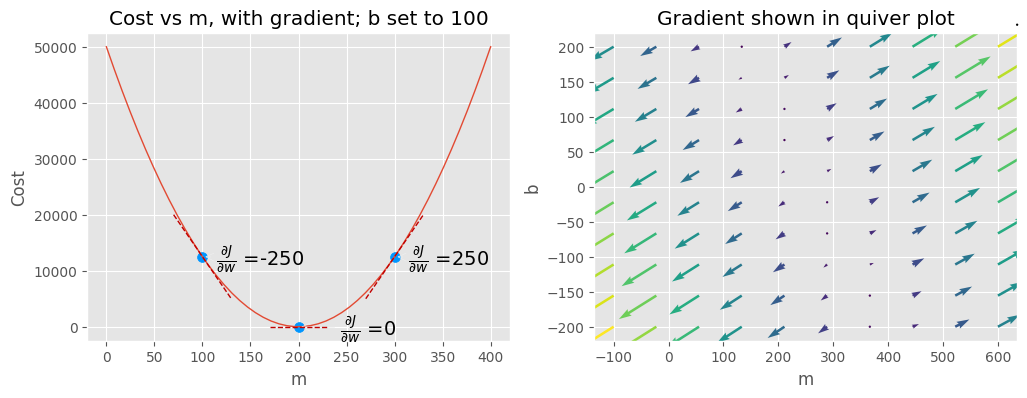

In [47]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

#### Set Gradient Descent Parameters

In [56]:
w_init = 0  #Starting w parameter
b_init = 0  #Starting b parameter
iterations = 11000  #Stopping criteria
tmp_alpha = 0.020   #Learn rate

In [57]:
# run gradient descent
w_final, b_final, J_hist, p_hist, data = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient) 
print(data)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

  Iteration          Cost w part deriv b part deriv           w           b
0   Initial  85000.000000                              0.000000    0.000000
0         0  73749.250000  -650.000000  -400.000000   13.000000    8.000000
0      1100      0.590610    -0.154551     0.250069  197.884470  103.423000
0      2200      0.023785    -0.031015     0.050184  199.575458  100.686923
0      3300      0.000958    -0.006224     0.010071  199.914804  100.137851
0      4400      0.000039    -0.001249     0.002021  199.982903  100.027664
0      5500      0.000002    -0.000251     0.000406  199.996569  100.005552
0      6600      0.000000    -0.000050     0.000081  199.999311  100.001114
0      7700      0.000000    -0.000010     0.000016  199.999862  100.000224
0      8800      0.000000    -0.000002     0.000003  199.999972  100.000045
0      9900      0.000000    -0.000000     0.000001  199.999994  100.000009
0     Final      0.000000    -0.000000     0.000000  199.999999  100.000002
(w,b) found 

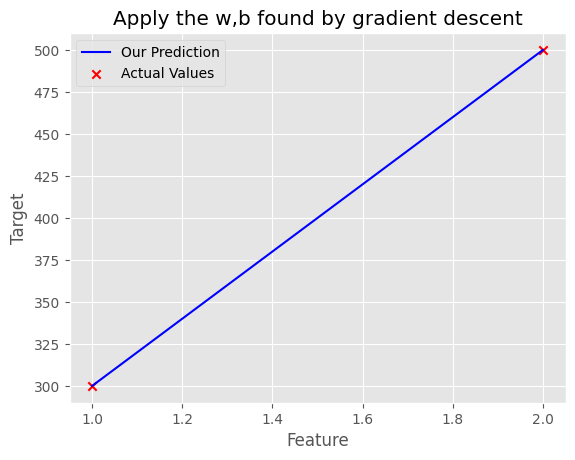

In [50]:
w = 200
b = 100

tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
plt.title('Apply the w,b found by gradient descent')
plt.ylabel('Target')
plt.xlabel('Feature')
plt.legend()
plt.show()

In [51]:
#Make predictions with w,b found by gradient descent
print(f"Feature = 1 prediction {w_final*1.0 + b_final:0.1f}")
print(f"Feature = 1.2 prediction {w_final*1.2 + b_final:0.1f}")
print(f"Feature = 2 prediction {w_final*2.0 + b_final:0.1f}")

Feature = 1 prediction 300.0
Feature = 1.2 prediction 340.0
Feature = 2 prediction 500.0


#### Optimal Progress of gradient descent

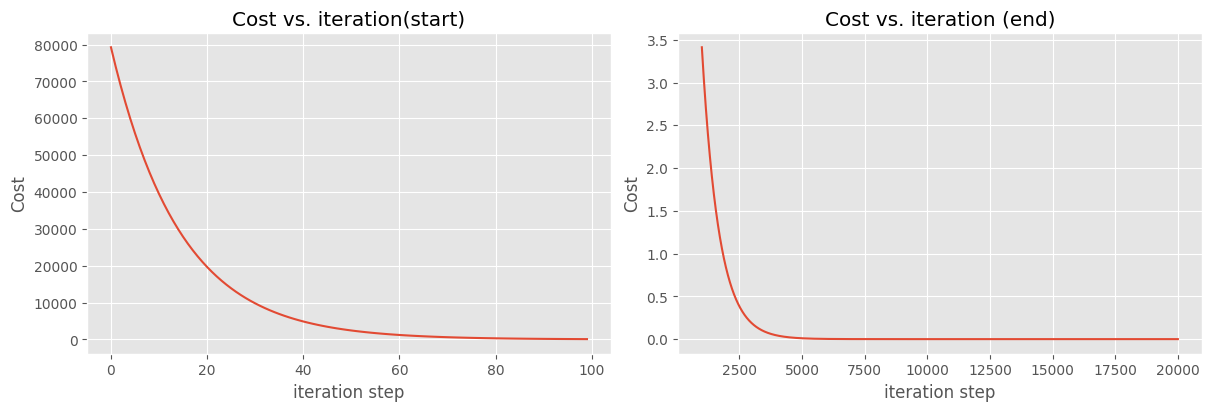

In [52]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

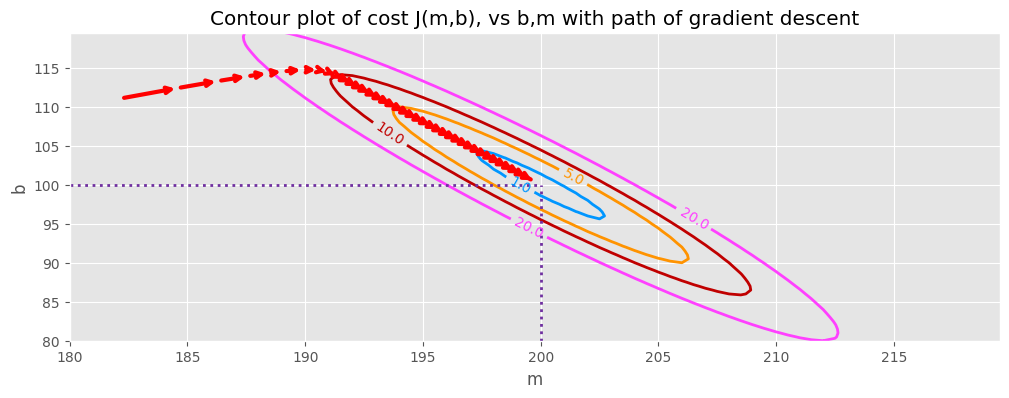

In [53]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_mgrad(x_train, y_train, p_hist, ax, m_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

#### Learning Rate & Stopping Criteria

Gradient Descent uses the learning rate as a value to increment $w$ and $b$ with each iteration. Whilst a larger learning rate can optimise Gradient Descent, it can result in an overshot. Also, a too-small learning rate can cause Gradient Descent to take too long to find convergence.

Stopping criteria are rules or conditions used to decide when to stop the iterative process of gradient descent. Since gradient descent is an iterative algorithm that updates parameters to minimize a loss function, it needs a clear rule to know when to stop. Stopping criteria can also stop over fitting. 

In [58]:
w_init = 0 #Starting m parameter
b_init = 0 #Starting b parameter
iterations = 10 #Stopping criteria
tmp_alpha = 0.8 #Learn rate
w_final, b_final, J_hist, p_hist, data = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient) 
print(data)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

  Iteration               Cost   w part deriv   b part deriv             w  \
0   Initial       85000.000000                                    0.000000   
0         0      257800.000000    -650.000000    -400.000000    520.000000   
0         1      781960.000000    1130.000000     700.000000   -384.000000   
0         2     2371904.320000   -1970.000000   -1216.000000   1192.000000   
0         3     7194705.318400    3429.200000    2120.800000  -1551.360000   
0         4    21823770.989056   -5974.160000   -3690.880000   3227.968000   
0         5    66198302.852731   10403.216000    6430.816000  -5094.604800   
0         6   200800132.730540  -18120.195200  -11197.696000   9401.551360   
0         7   609089564.951012   31557.430400   19504.695040 -15844.392960   
0         8  1847559057.615908  -54963.064448  -33967.977472  28126.058598   
0         9  5604224211.962118   95724.637414   59162.081843 -48453.651333   
0     Final  5604224211.962118   95724.637414   59162.081843 -48

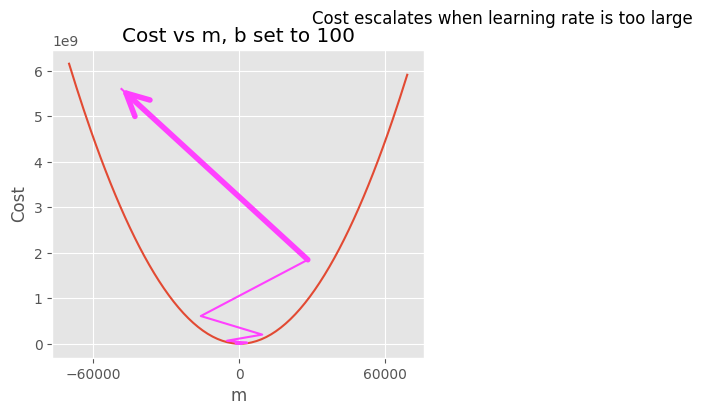

In [59]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()

#### Data normalisation

Normalising data ensures that all features contribute equally and gradient descent works efficiently and stably, leading to faster and more reliable training of your model.

In [60]:
# Normalize x_train and y_train to optimise gradient descent
x_min, x_max = x_train.min(), x_train.max()
y_min, y_max = y_train.min(), y_train.max()

x_train_norm = (x_train - x_min) / (x_max - x_min)
y_train_norm = (y_train - y_min) / (y_max - y_min)

print("Normalized x_train:", x_train_norm)
print("Normalized y_train:", y_train_norm)

Normalized x_train: [0. 1.]
Normalized y_train: [0. 1.]


  Iteration      Cost w part deriv b part deriv         w             b
0   Initial  0.250000                            0.000000  0.000000e+00
0         0  0.225781    -0.500000    -0.500000  0.025000  2.500000e-02
0       300  0.000214    -0.007769     0.004802  0.959708  2.490156e-02
0       600  0.000001    -0.000437     0.000270  0.997735  1.399927e-03
0       900  0.000000    -0.000025     0.000015  0.999873  7.870167e-05
0      1200  0.000000    -0.000001     0.000001  0.999993  4.424484e-06
0      1500  0.000000    -0.000000     0.000000  1.000000  2.487375e-07
0      1800  0.000000    -0.000000     0.000000  1.000000  1.398363e-08
0      2100  0.000000    -0.000000     0.000000  1.000000  7.861378e-10
0      2400  0.000000    -0.000000     0.000000  1.000000  4.419558e-11
0      2700  0.000000    -0.000000     0.000000  1.000000  2.484632e-12
0     Final  0.000000    -0.000000     0.000000  1.000000  1.410569e-13
(w,b) found by gradient descent: (  1.0000,  0.0000)


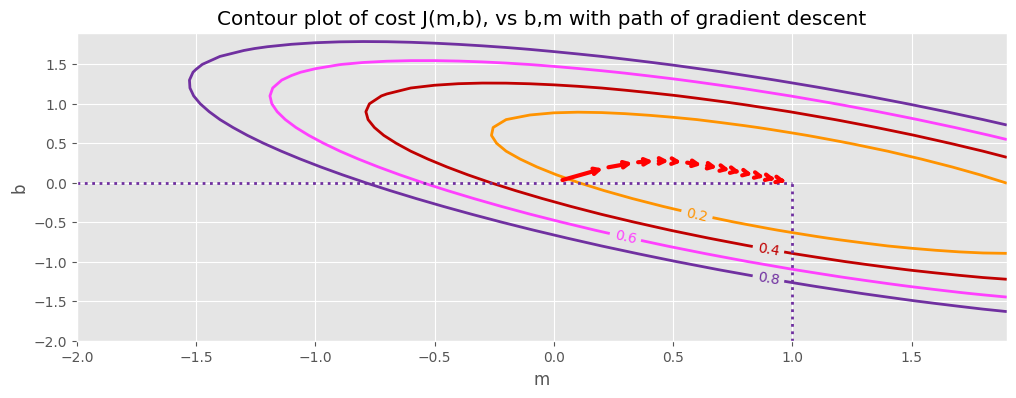

In [63]:
# initialize parameters
w_init_norm = 0
b_init_norm = 0
# some gradient descent settings
iterations_norm = 3000
tmp_alpha_norm = 0.05

w_final, b_final, J_hist, p_hist, data = gradient_descent(x_train_norm ,y_train_norm, w_init_norm, b_init_norm, tmp_alpha_norm, iterations_norm, compute_cost, compute_gradient) 
print(data)
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_mgrad(x_train_norm, y_train_norm, p_hist, ax, m_range=[-2, 2, 0.1], b_range=[-2, 2, 0.1],
            contours=[0,0.2,0.4,0.6,0.8],resolution=0.05, w_final=w_final, b_final=b_final)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

#### Multiple minima also known as local cost versus global cost.

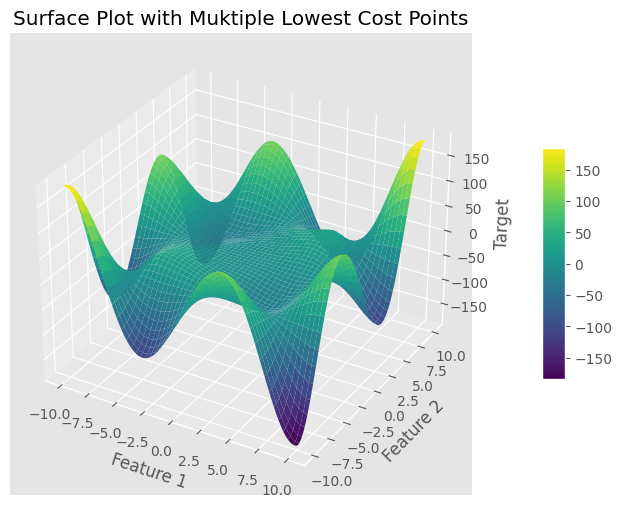

In [64]:
# Gradient Descent with Non MSE Cost Function with multiple minima
x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)
X, Y = np.meshgrid(x, y)
Z = (X**2 + Y**2) * np.sin(X / 2) * np.sin(Y / 2) + 10 * np.exp(-((X - 5)**2 + (Y - 5)**2)) \
    + 8 * np.exp(-((X + 5)**2 + (Y + 5)**2))
fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title("Surface Plot with Muktiple Lowest Cost Points")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Target")
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()